In [1]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL.Image

In [2]:
train_data = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_data = ImageDataGenerator(rescale=1.0/255)

train_gen = train_data.flow_from_directory("Dataset/Train/",
                                                    batch_size =256 ,
                                                    class_mode = 'binary', 
                                                    target_size = (64, 64))

validation_gen = test_data.flow_from_directory("Dataset/Validation/",
                                                          batch_size  = 256,
                                                          class_mode  = 'binary', 
                                                          target_size = (64, 64))

Found 13000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [3]:
model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [4]:
model.compile(
    optimizer=Adam(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [7]:
import scipy
hist = model.fit_generator(generator=train_gen,
                           validation_data=validation_gen,
                        #    steps_per_epoch=256,
                        #    validation_steps=256,
                           epochs=12)

C:\Users\bonal\AppData\Local\Temp\ipykernel_2380\2777446188.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_gen,


Epoch 1/12
51/51 [==============================] - 788s 12s/step - loss: 0.6698 - accuracy: 0.6085 - val_loss: 0.6956 - val_accuracy: 0.5815
Epoch 2/12
51/51 [==============================] - 688s 14s/step - loss: 0.6218 - accuracy: 0.6652 - val_loss: 1.0255 - val_accuracy: 0.5397
Epoch 3/12
51/51 [==============================] - 477s 9s/step - loss: 0.5530 - accuracy: 0.7220 - val_loss: 0.6150 - val_accuracy: 0.6873
Epoch 4/12
51/51 [==============================] - 471s 9s/step - loss: 0.5176 - accuracy: 0.7505 - val_loss: 0.5234 - val_accuracy: 0.7262
Epoch 5/12
51/51 [==============================] - 457s 9s/step - loss: 0.4696 - accuracy: 0.7832 - val_loss: 1.8365 - val_accuracy: 0.5000
Epoch 6/12
51/51 [==============================] - 471s 9s/step - loss: 0.4326 - accuracy: 0.8042 - val_loss: 1.4830 - val_accuracy: 0.5145
Epoch 7/12
51/51 [==============================] - 454s 9s/step - loss: 0.3938 - accuracy: 0.8318 - val_loss: 1.0247 - val_accuracy: 0.6510
Epoch 8/12


In [8]:
model.save('gender-classification-cnn-epochs-12.h5')

1/1 [==============================] - 2s 2s/step
[1.]
The person in the image is male.


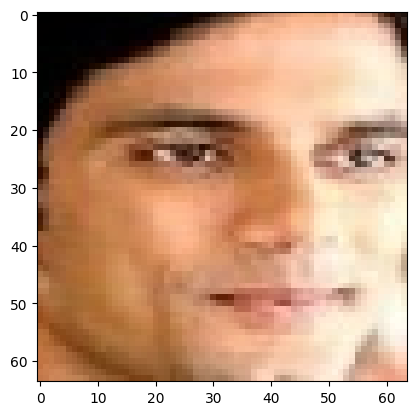

In [14]:
# predicting the images and testing the model for both male and female image samples
import keras
# path = "Dataset/Test/Female/testimg.jpg"
path = "Dataset/Test/Male/male_test.jpg"
img = keras.utils.load_img(path, target_size=(64, 64))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("The person in the image is male.")
else:
    print( "The person in the image is female.")
plt.imshow(img)